In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [4]:
df = pd.read_excel('Concrete_Data.xls')

In [5]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [6]:
df.shape

(1030, 9)

In [7]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [8]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [10]:
x =df.iloc[:,:-2]

In [12]:
y = df.iloc[:,-1]

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [15]:
## Applying Regression without any transformation

lr = LinearRegression()

lr.fit(X_train,Y_train)

LinearRegression()

In [17]:
y_pred = lr.predict(X_test)

print("The accuracy of the model is :" ,r2_score(Y_test,y_pred))


The accuracy of the model is : 0.4170040355439131


In [18]:
# Cross Validation

lr = LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring='r2'))


np.float64(0.16746490497521338)

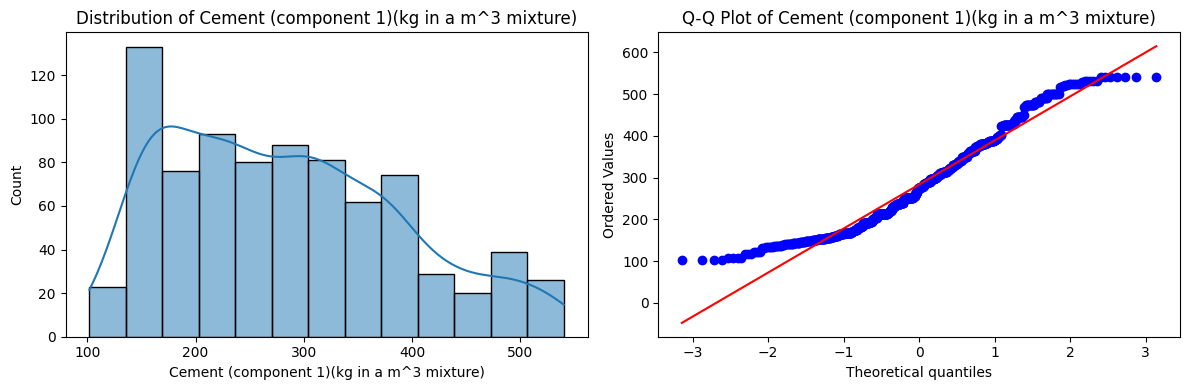

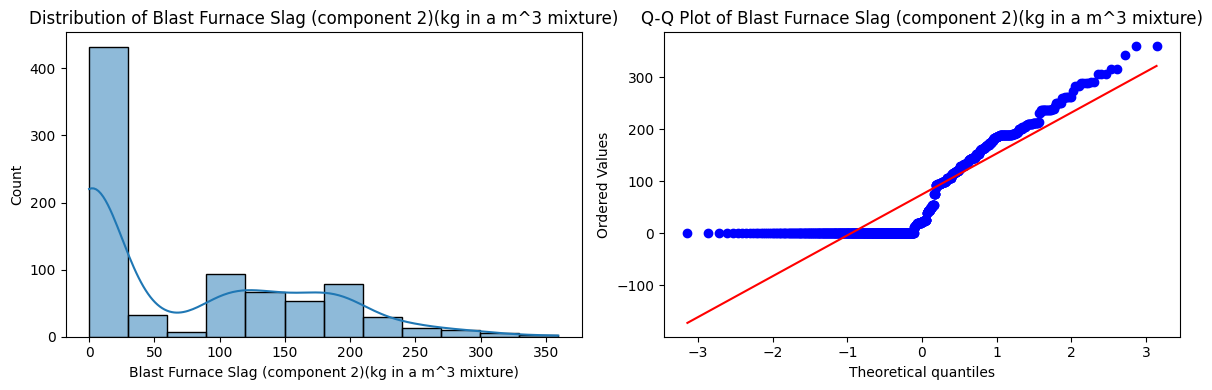

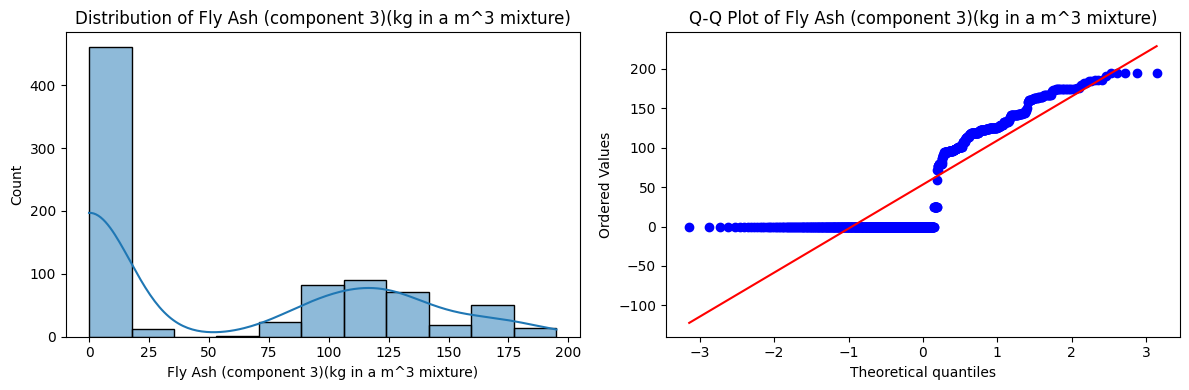

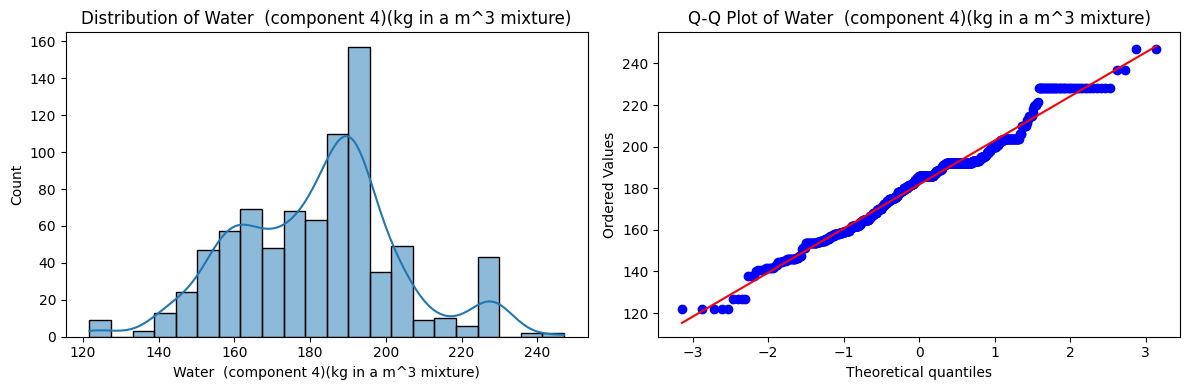

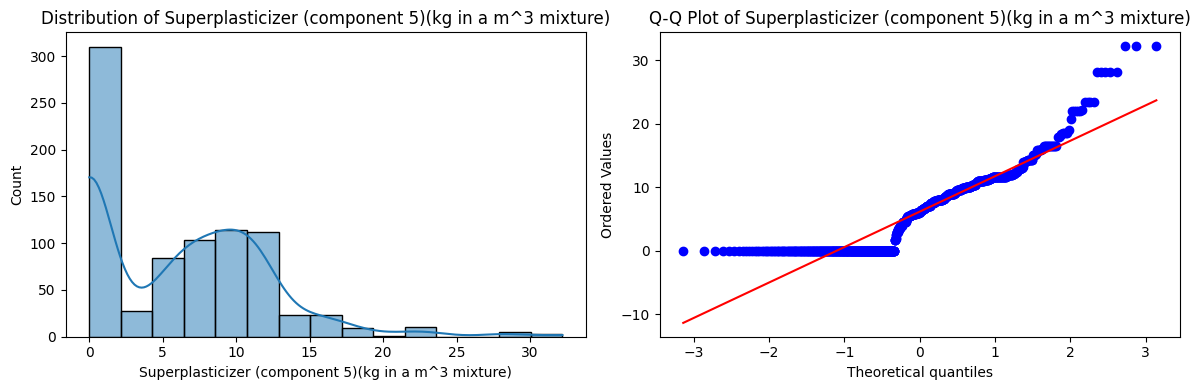

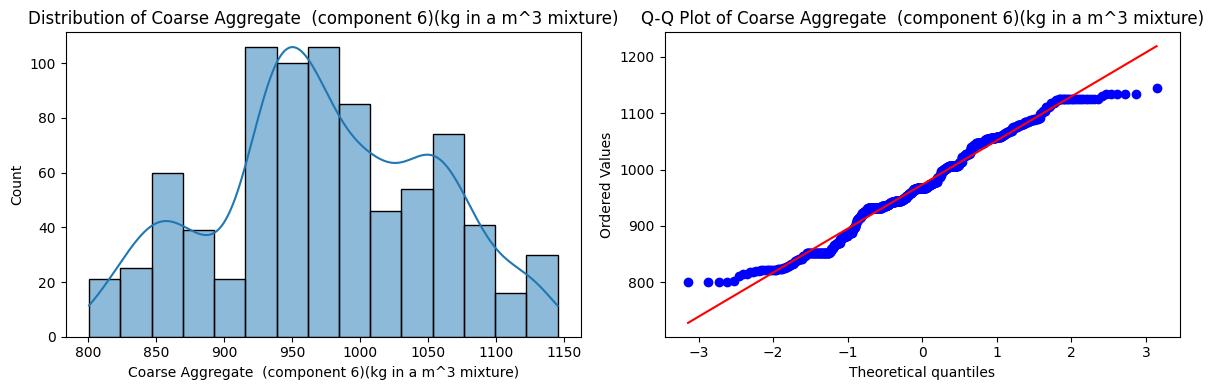

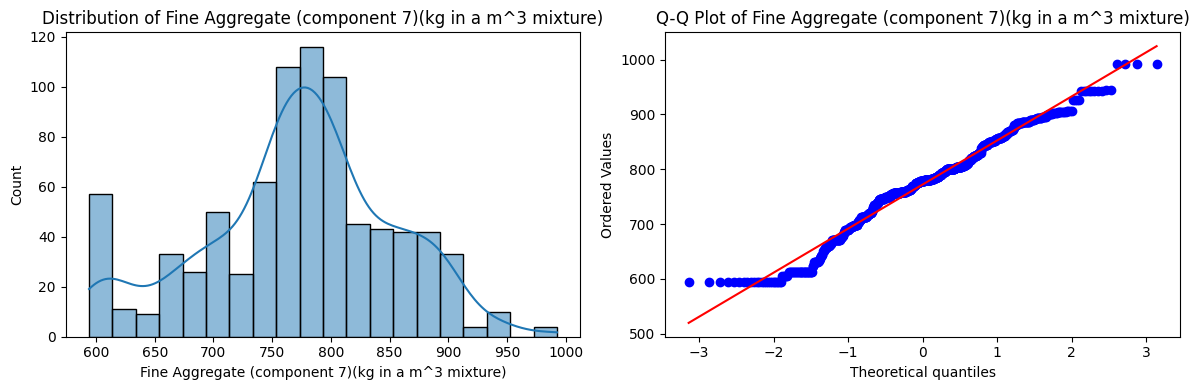

In [25]:
for col in X_train.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figure size for better visualization
    
    # Histogram + KDE
    sns.histplot(X_train[col], kde=True, ax=axes[0])  
    axes[0].set_title(f'Distribution of {col}')
    
    # Q-Q Plot
    stats.probplot(X_train[col], dist="norm", plot=axes[1])
    axes[1].set_title(f'Q-Q Plot of {col}')
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

In [27]:
# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

In [28]:
pd.DataFrame({'cols' :X_train.columns,'box_cox_lamdas' : pt.lambdas_})


,cols,box_cox_lamdas
0,Cement (component 1)(kg in a m^3 mixture),0.176959
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,0.026620
2,Fly Ash (component 3)(kg in a m^3 mixture),-0.038971
3,Water (component 4)(kg in a m^3 mixture),0.773907
4,Superplasticizer (component 5)(kg in a m^3 mix...,0.098811
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,1.129733
6,Fine Aggregate (component 7)(kg in a m^3 mixture),1.781909


In [31]:
## Applying Regression with transformation

lr = LinearRegression()

lr.fit(X_train_transformed,Y_train)

y_pred2  =lr.predict(X_test_transformed)

r2_score(Y_test,y_pred2)

0.41740431327909167

In [32]:
# Using cross validation

X_transformed = pt.fit_transform(x+0.00001)

lr = LinearRegression()

np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))


np.float64(0.23286315100414995)

In [34]:
# Yeo-Johnson 

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,Y_train)

y_pred3 = lr.predict(X_test_transformed2)
print(r2_score(Y_test,y_pred3))








0.4310007749687901
